# APPENDIX_GROUP B_CKD PREDICTION

# DM Project Full Coding

In [1]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc, mean_squared_error, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
import tkinter as tk
from tkinter import ttk
from ttkthemes import ThemedStyle
import joblib

In [2]:
# Data Exploration
balance_data = pd.read_csv('cleaned_data.csv', sep=',', header=0)
print("Dataset Length: ", len(balance_data))
print("Dataset Shape: ", balance_data.shape)
print("Data Exploration:")
print(balance_data.head())
print(balance_data.describe())

Dataset Length:  400
Dataset Shape:  (400, 25)
Data Exploration:
    Age    Bp     Sg   Al   Su   Rbc   Pc  Pcc   Ba     Bgr  ...   Pcv  \
0  48.0  80.0  1.020  1.0  0.0  0.81  1.0  0.0  0.0  121.00  ...  44.0   
1   7.0  50.0  1.020  4.0  0.0  0.81  1.0  0.0  0.0  148.04  ...  38.0   
2  62.0  80.0  1.010  2.0  3.0  1.00  1.0  0.0  0.0  423.00  ...  31.0   
3  48.0  70.0  1.005  4.0  0.0  1.00  0.0  1.0  0.0  117.00  ...  32.0   
4  51.0  80.0  1.010  2.0  0.0  1.00  1.0  0.0  0.0  106.00  ...  35.0   

     Wbcc  Rbcc  Htn  Dm  Cad  Appet   pe  Ane  Class  
0  7800.0  5.20  1.0   1  0.0    1.0  0.0  0.0    ckd  
1  6000.0  4.71  0.0   0  0.0    1.0  0.0  0.0    ckd  
2  7500.0  4.71  0.0   1  0.0    0.0  0.0  1.0    ckd  
3  6700.0  3.90  1.0   0  0.0    0.0  1.0  1.0    ckd  
4  7300.0  4.60  0.0   0  0.0    1.0  0.0  0.0    ckd  

[5 rows x 25 columns]
              Age          Bp          Sg          Al          Su         Rbc  \
count  400.000000  400.000000  400.000000  400.000

In [3]:
# Building Phase
# Separating the target variable
X = balance_data.values[:, 0:24]
Y = balance_data.values[:, -1]


In [4]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

# Decision Tree

In [5]:
# Hyperparameter Tuning for decision tree
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [3, 5, 7]
}

clf = DecisionTreeClassifier(random_state=100)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
tuned_clf = grid_search.best_estimator_


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 7}


In [6]:
# Training phase
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=7)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=7, random_state=100)

In [7]:
# Operational Phase
print("\nResults Using Gini Index:")
y_pred_gini = clf_gini.predict(X_test)
y_test_binary = np.where(y_test == 'ckd', 1, 0)
y_pred_gini_binary = np.where(y_pred_gini == 'ckd', 1, 0)
# Metrics for Decision Tree
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gini))
print("Accuracy:", accuracy_score(y_test,y_pred_gini) * 100)
print("Report:\n", classification_report(y_test, y_pred_gini))
print("F1 Score:", f1_score(y_test_binary, y_pred_gini_binary))
print("AUC Score:", roc_auc_score(y_test_binary, y_pred_gini_binary))


Results Using Gini Index:
Confusion Matrix:
 [[77  3]
 [ 1 39]]
Accuracy: 96.66666666666667
Report:
               precision    recall  f1-score   support

         ckd       0.99      0.96      0.97        80
      notckd       0.93      0.97      0.95        40

    accuracy                           0.97       120
   macro avg       0.96      0.97      0.96       120
weighted avg       0.97      0.97      0.97       120

F1 Score: 0.9746835443037976
AUC Score: 0.96875


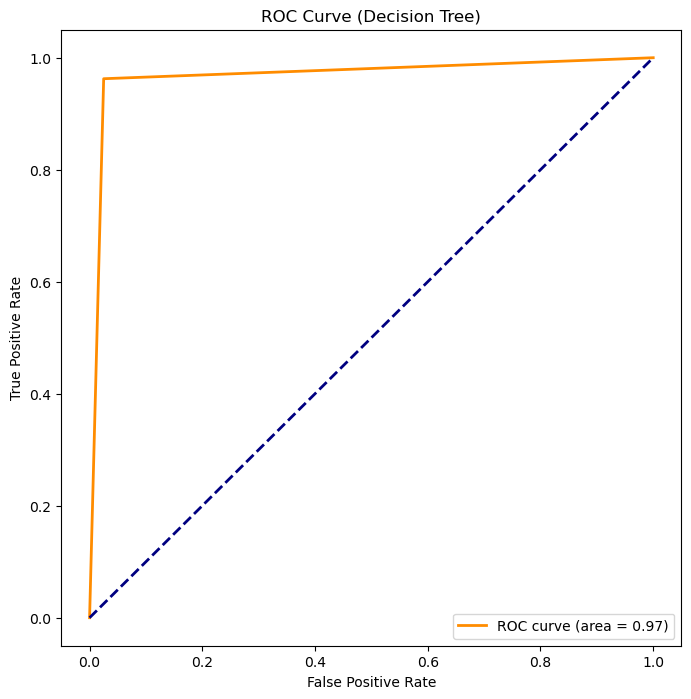

In [8]:
# ROC Curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test_binary,y_pred_gini_binary)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(8, 8))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_dt))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree)')
plt.legend(loc="lower right")
plt.show()

In [9]:
# Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for Decision Tree
mse_dt = mean_squared_error(y_test_binary,y_pred_gini_binary)
rmse_dt = np.sqrt(mse_dt)
print("Mean Squared Error (MSE):", mse_dt)
print("Root Mean Squared Error (RMSE):", rmse_dt)

Mean Squared Error (MSE): 0.03333333333333333
Root Mean Squared Error (RMSE): 0.18257418583505536


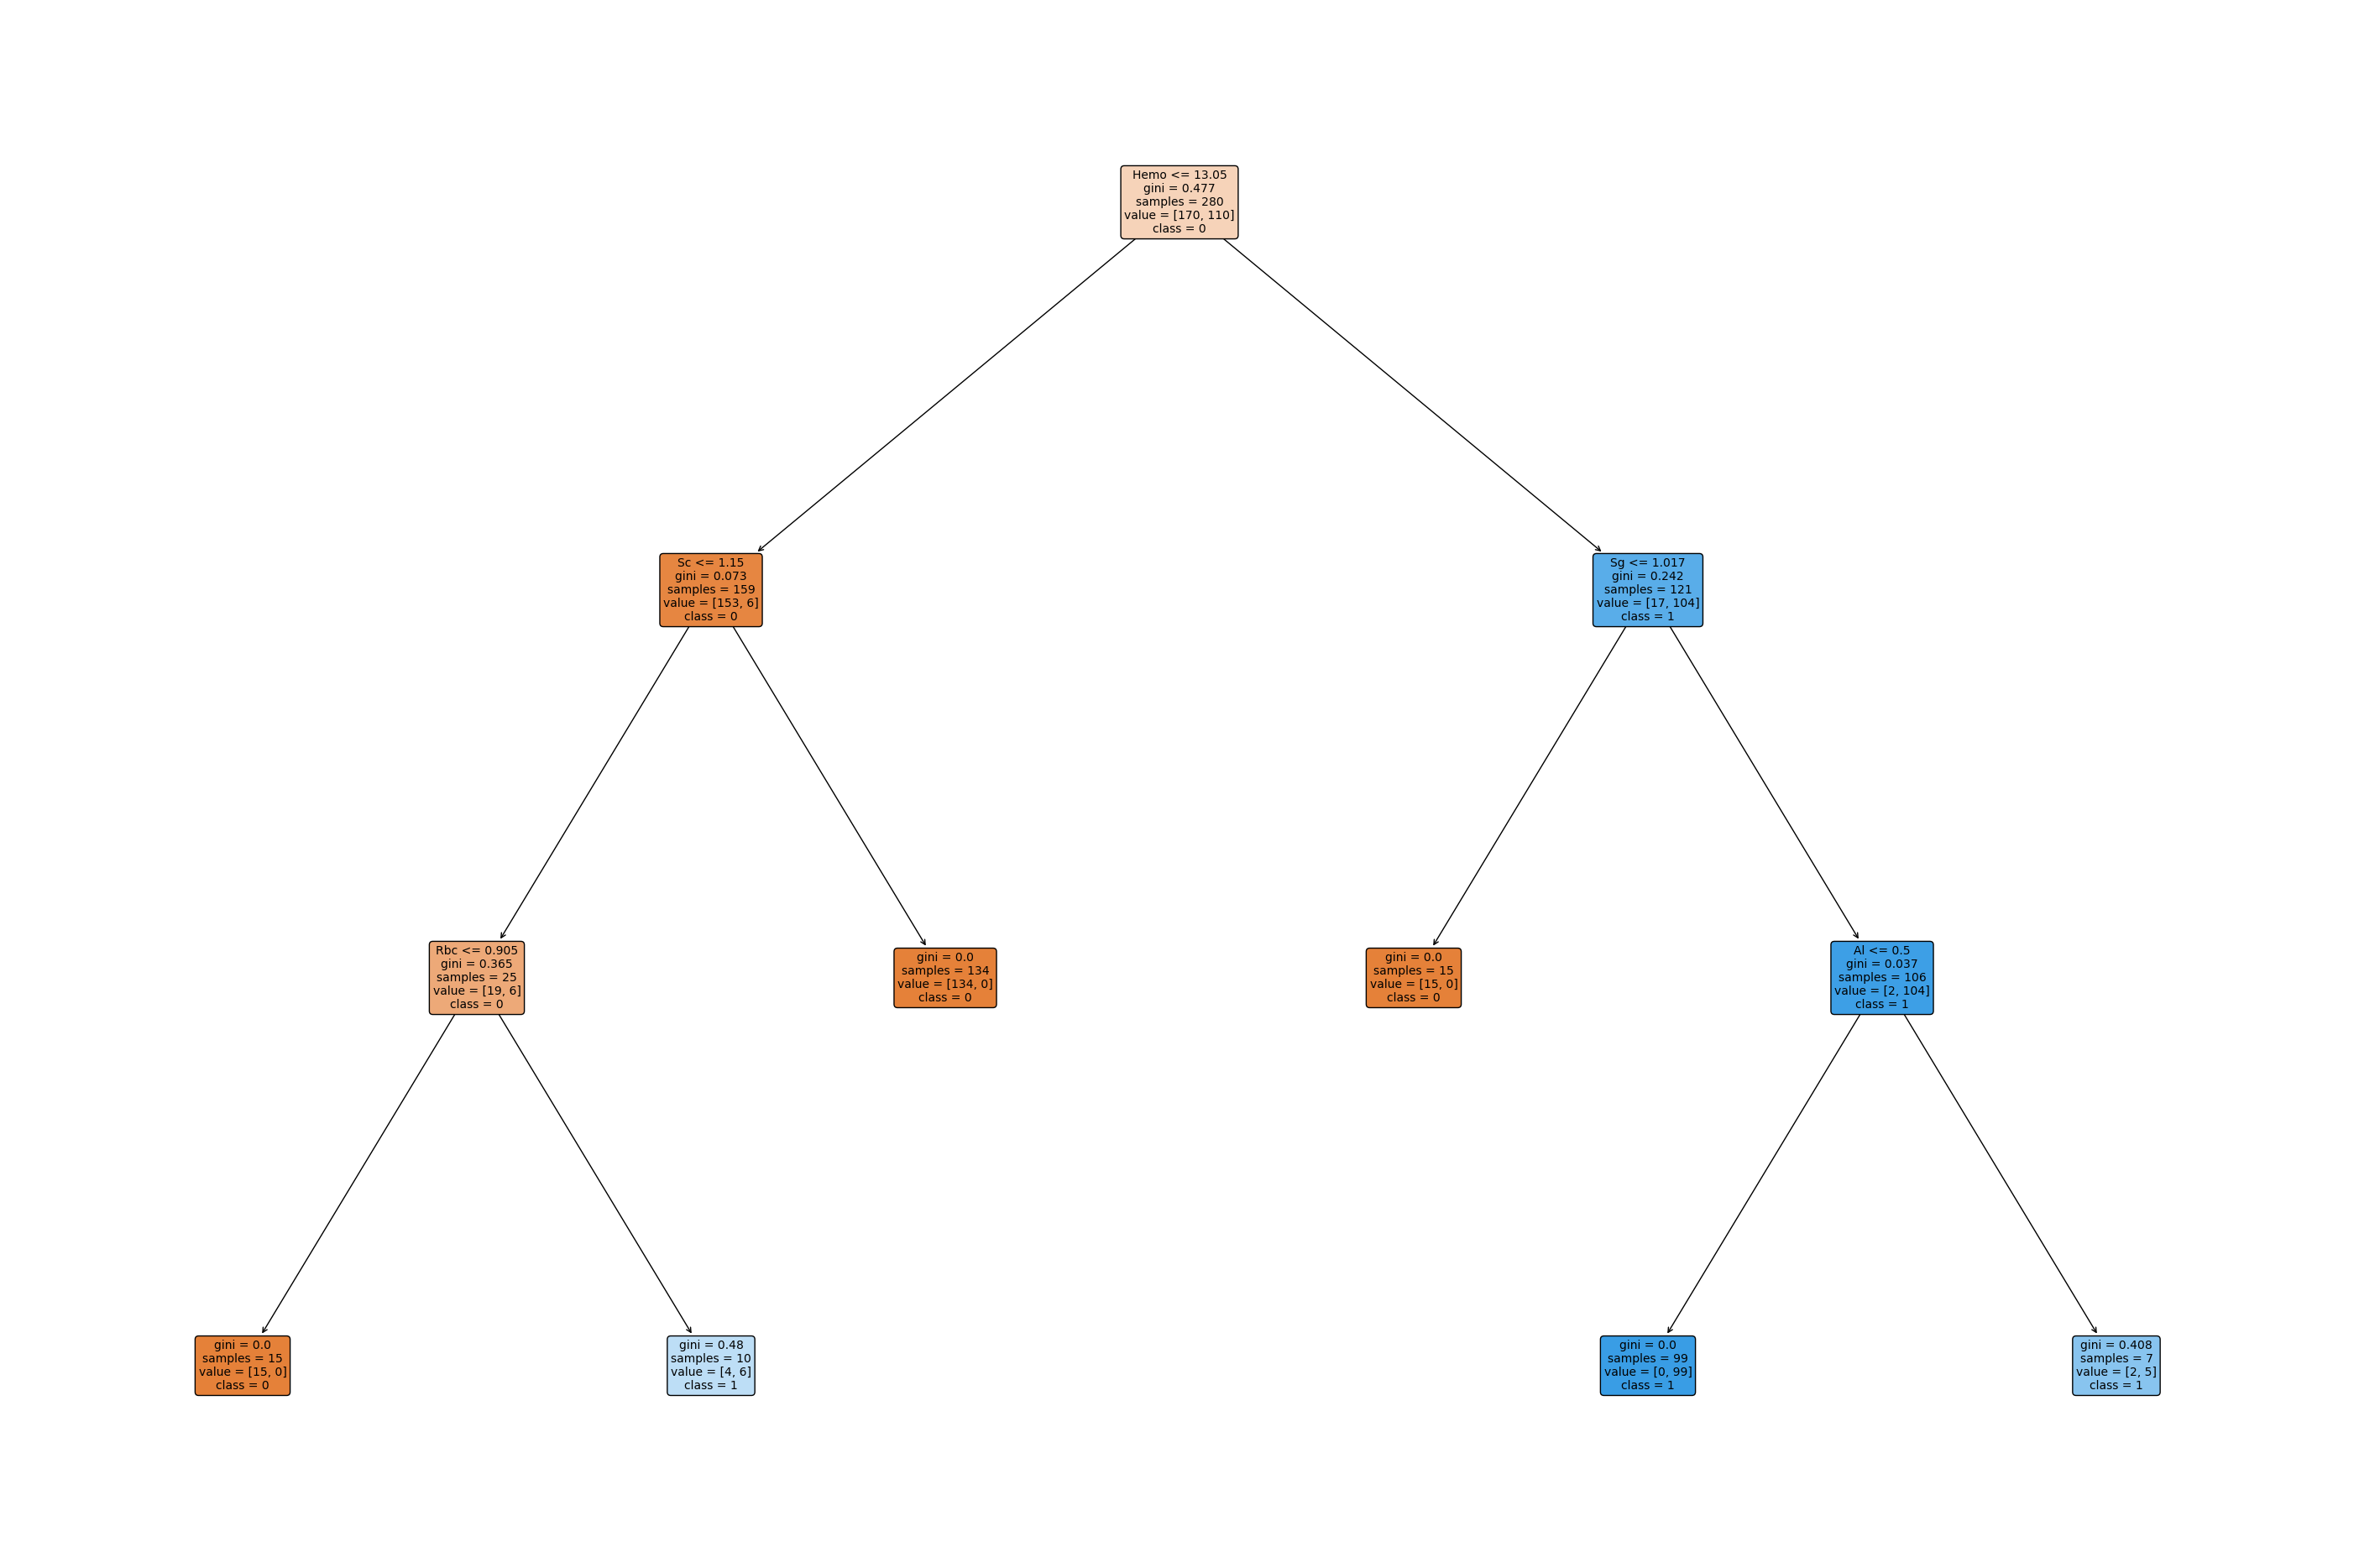

In [10]:
# Visualizing Decision Trees using plot_tree
plt.figure(figsize=(36, 24))
plot_tree(clf_gini, filled=True, feature_names=balance_data.columns[:-1], class_names=["0", "1"], rounded=True, fontsize=10)
plt.show()

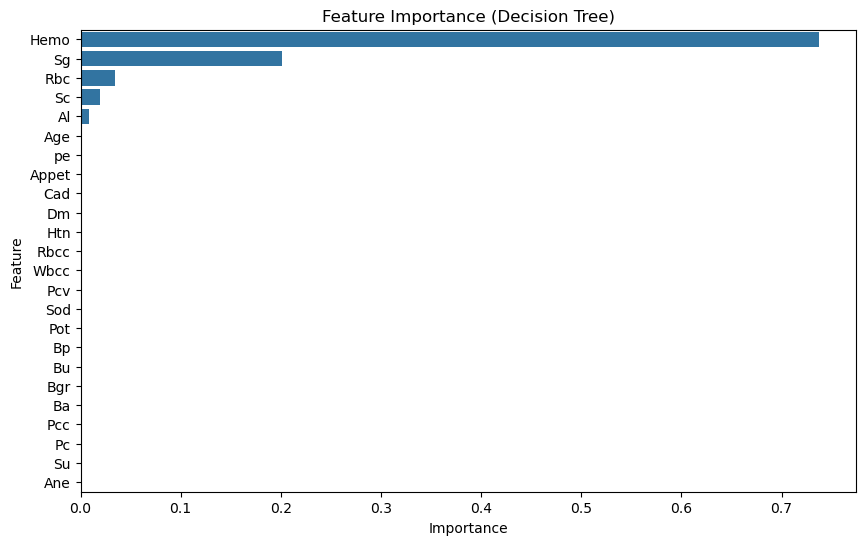

In [11]:
# Feature Importance for Decision Tree
feature_importance_dt = pd.DataFrame({'Feature': balance_data.columns[:-1], 'Importance': clf_gini.feature_importances_})
feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_dt)
plt.title('Feature Importance (Decision Tree)')
plt.show()

In [12]:
# Cross-Validation for Decision Tree
cv_results_dt = cross_val_score(clf_gini, X, Y, cv=5, scoring='accuracy')
print("Cross-Validation Results (Decision Tree):", cv_results_dt)
print("Mean Accuracy (Decision Tree):", np.mean(cv_results_dt))

Cross-Validation Results (Decision Tree): [0.95   1.     0.9375 0.975  0.9875]
Mean Accuracy (Decision Tree): 0.9700000000000001


# Random Forest

In [13]:
# Hyperparameter Tuning for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [3, 5, 7],
    'max_features': ['sqrt', 'log2']
}

clf_rf = RandomForestClassifier(random_state=100)
grid_search_rf = GridSearchCV(estimator=clf_rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print("Best Hyperparameters (Random Forest):", grid_search_rf.best_params_)
tuned_clf_rf = grid_search_rf.best_estimator_


Best Hyperparameters (Random Forest): {'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 50}


In [14]:
# Training phase for Random Forest
clf_rf = RandomForestClassifier(n_estimators=50, max_depth=3, min_samples_leaf=3, max_features='sqrt', random_state=100)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, min_samples_leaf=3, n_estimators=50,
                       random_state=100)

In [15]:
# Operational Phase for Random Forest
print("\nResults Using Random Forest:")
y_pred_rf = clf_rf.predict(X_test)
y_test_binary = np.where(y_test == 'ckd', 1, 0)
y_pred_rf_binary = np.where(y_pred_rf == 'ckd', 1, 0)
# Metrics for Random Forest
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf) * 100)
print("Report:\n", classification_report(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test_binary, y_pred_rf_binary))
print("AUC Score:", roc_auc_score(y_test_binary, y_pred_rf_binary))



Results Using Random Forest:
Confusion Matrix:
 [[80  0]
 [ 1 39]]
Accuracy: 99.16666666666667
Report:
               precision    recall  f1-score   support

         ckd       0.99      1.00      0.99        80
      notckd       1.00      0.97      0.99        40

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

F1 Score: 0.9937888198757764
AUC Score: 0.9874999999999999


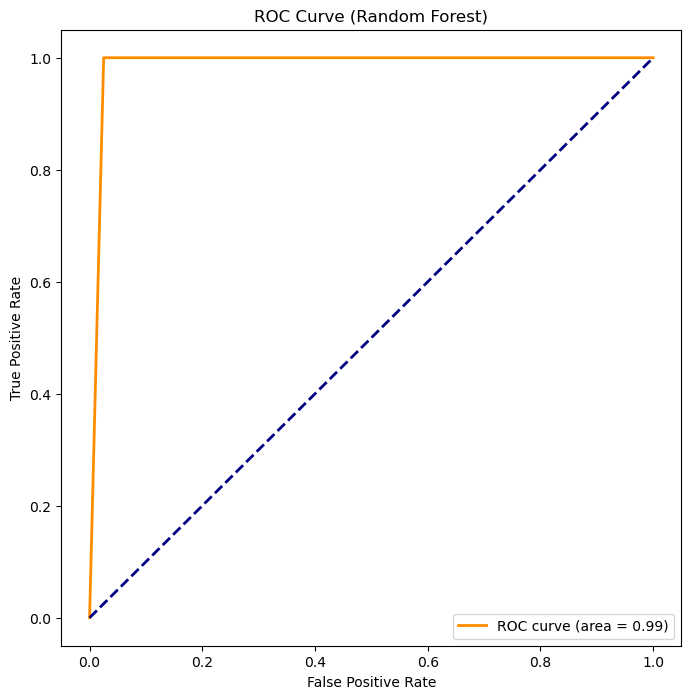

In [16]:
# ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_binary, y_pred_rf_binary)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 8))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Random Forest)')
plt.legend(loc="lower right")
plt.show()

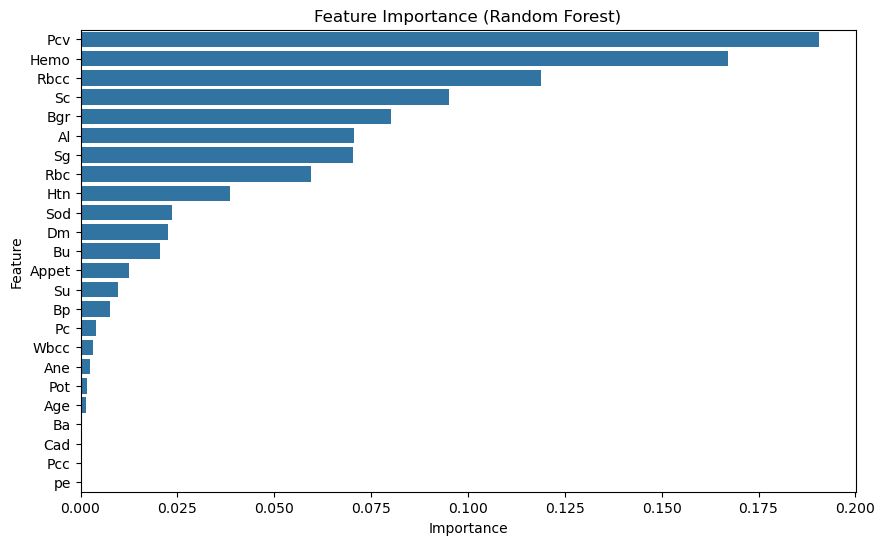

In [17]:
# Feature Importance for Random Forest
feature_importance_rf = pd.DataFrame({'Feature': balance_data.columns[:-1], 'Importance': clf_rf.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf)
plt.title('Feature Importance (Random Forest)')
plt.show()

In [18]:
# Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for Random Forest
mse_rf = mean_squared_error(y_test_binary, y_pred_rf_binary)
rmse_rf = np.sqrt(mse_rf)
print("Mean Squared Error (MSE):", mse_rf)
print("Root Mean Squared Error (RMSE):", rmse_rf)


Mean Squared Error (MSE): 0.008333333333333333
Root Mean Squared Error (RMSE): 0.09128709291752768


In [19]:
# Cross-Validation for Random Forest
cv_results_rf = cross_val_score(clf_rf, X, Y, cv=5, scoring='accuracy')
print("Cross-Validation Results (Random Forest):", cv_results_rf)
print("Mean Accuracy (Random Forest):", np.mean(cv_results_rf))

Cross-Validation Results (Random Forest): [0.9875 1.     0.9625 1.     1.    ]
Mean Accuracy (Random Forest): 0.99


# Support Vector Machine

In [20]:
# Training phase for Support Vector Machine (SVM)
clf_svm = SVC(kernel='rbf', random_state=100)
clf_svm.fit(X_train, y_train)


SVC(random_state=100)

In [21]:
# Operational Phase for SVM
print("\nResults Using SVM:")
y_pred_svm = clf_svm.predict(X_test)
y_test_binary = np.where(y_test == 'ckd', 1, 0)
y_pred_svm_binary = np.where(y_pred_svm == 'ckd', 1, 0)
# Metrics for SVM
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm) * 100)
print("Report:\n", classification_report(y_test, y_pred_svm, zero_division=1))
print("F1 Score:", f1_score(y_test_binary, y_pred_svm_binary))
print("AUC Score:", roc_auc_score(y_test_binary, y_pred_svm_binary))



Results Using SVM:
Confusion Matrix:
 [[80  0]
 [40  0]]
Accuracy: 66.66666666666666
Report:
               precision    recall  f1-score   support

         ckd       0.67      1.00      0.80        80
      notckd       1.00      0.00      0.00        40

    accuracy                           0.67       120
   macro avg       0.83      0.50      0.40       120
weighted avg       0.78      0.67      0.53       120

F1 Score: 0.8
AUC Score: 0.5


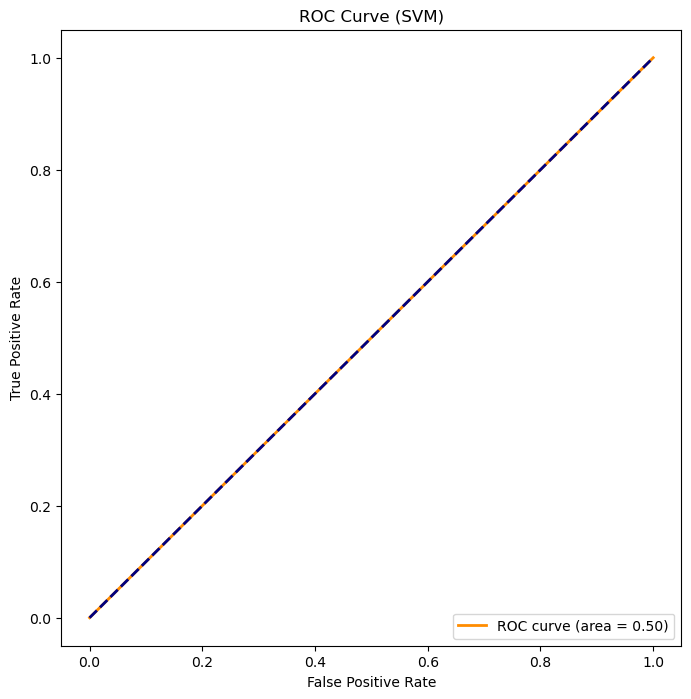

In [22]:
# ROC Curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test_binary, y_pred_svm_binary)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure(figsize=(8, 8))
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_svm))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM)')
plt.legend(loc="lower right")
plt.show()

In [23]:
# Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for SVM
mse_svm = mean_squared_error(y_test_binary, y_pred_svm_binary)
rmse_svm = np.sqrt(mse_svm)
print("Mean Squared Error (MSE) for SVM:", mse_svm)
print("Root Mean Squared Error (RMSE) for SVM:", rmse_svm)

Mean Squared Error (MSE) for SVM: 0.3333333333333333
Root Mean Squared Error (RMSE) for SVM: 0.5773502691896257


In [24]:
# Cross-Validation for SVM
cv_results_svm = cross_val_score(clf_svm, X, Y, cv=5, scoring='accuracy')
print("Cross-Validation Results (SVM):", cv_results_svm)
print("Mean Accuracy (SVM):", np.mean(cv_results_svm))

Cross-Validation Results (SVM): [0.625 0.625 0.625 0.625 0.625]
Mean Accuracy (SVM): 0.625


# Logistic Regression

In [25]:
# Hyperparameter Tuning for Logistic Regression
param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

clf_lr = LogisticRegression(random_state=100, solver='liblinear')
grid_search_lr = GridSearchCV(estimator=clf_lr, param_grid=param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)
print("Best Hyperparameters (Logistic Regression):", grid_search_lr.best_params_)
tuned_clf_lr = grid_search_lr.best_estimator_

Best Hyperparameters (Logistic Regression): {'C': 1, 'penalty': 'l2'}


In [26]:
# Training phase for Logistic Regression
clf_lr = LogisticRegression(C=1, penalty='l2', max_iter=100, random_state=100)
clf_lr.fit(X_train, y_train)

C:\Users\PC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, random_state=100)

In [27]:
# Operational Phase for Logistic Regression
print("\nResults Using Logistic Regression:")
y_pred_lr = clf_lr.predict(X_test)
y_pred_lr_binary = np.where(y_pred_lr == 'ckd', 1, 0)
# Metrics for Logistic Regression
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr) * 100)
print("Report:\n", classification_report(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test_binary, y_pred_lr_binary))
print("AUC Score:", roc_auc_score(y_test_binary, y_pred_lr_binary))


Results Using Logistic Regression:
Confusion Matrix:
 [[74  6]
 [ 2 38]]
Accuracy: 93.33333333333333
Report:
               precision    recall  f1-score   support

         ckd       0.97      0.93      0.95        80
      notckd       0.86      0.95      0.90        40

    accuracy                           0.93       120
   macro avg       0.92      0.94      0.93       120
weighted avg       0.94      0.93      0.93       120

F1 Score: 0.9487179487179489
AUC Score: 0.9374999999999999


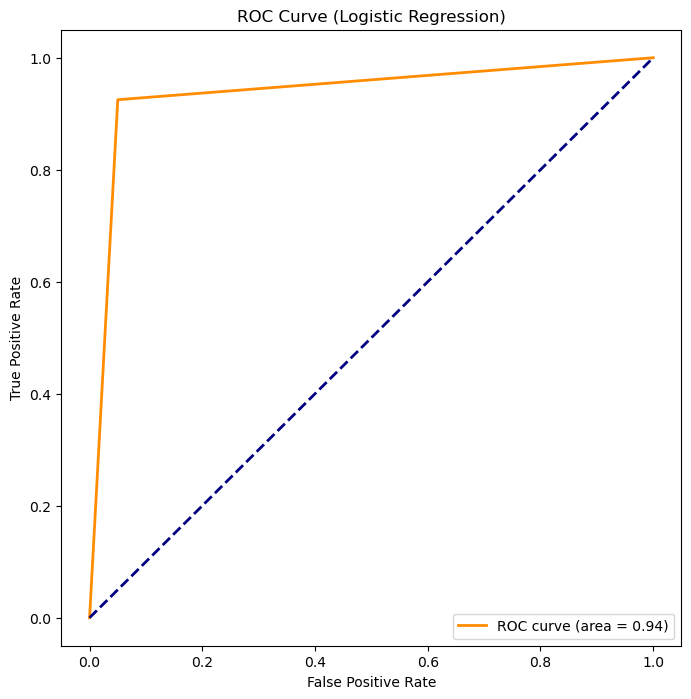

In [28]:
# ROC Curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test_binary, y_pred_lr_binary)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(8, 8))
plt.plot(fpr_lr, tpr_lr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_lr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression)')
plt.legend(loc="lower right")
plt.show()

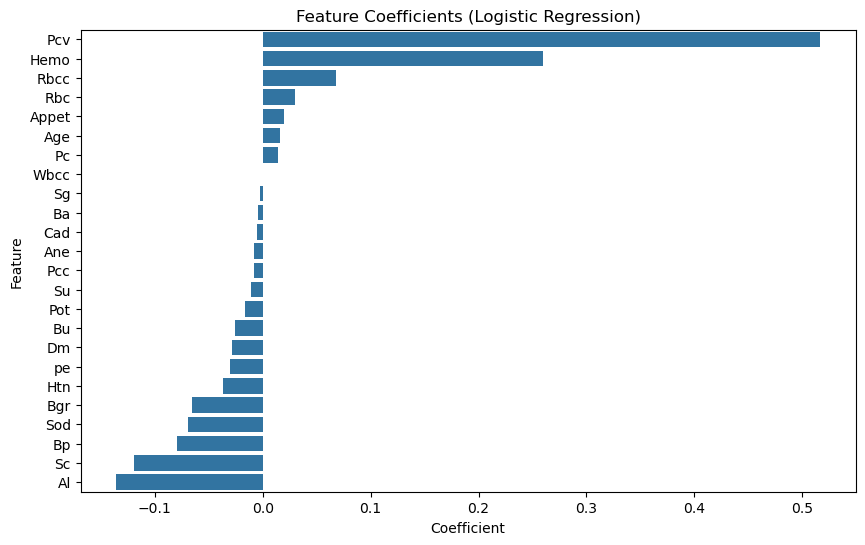

In [29]:
# Feature Coefficients for Logistic Regression
feature_coefficients_lr = pd.DataFrame({'Feature': balance_data.columns[:-1], 'Coefficient': clf_lr.coef_[0]})
feature_coefficients_lr = feature_coefficients_lr.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_coefficients_lr)
plt.title('Feature Coefficients (Logistic Regression)')
plt.show()

In [30]:
# Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for Logistic Regression
mse_lr = mean_squared_error(y_test_binary, y_pred_lr_binary)
rmse_lr = np.sqrt(mse_lr)
print("Mean Squared Error (MSE):", mse_lr)
print("Root Mean Squared Error (RMSE):", rmse_lr)

Mean Squared Error (MSE): 0.06666666666666667
Root Mean Squared Error (RMSE): 0.2581988897471611


# Naive Bayes

In [31]:
# Naive Bayes - Gaussian Naive Bayes does not have many hyperparameters to tune
clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

GaussianNB()

In [32]:
# Operational Phase for Naive Bayes
print("\nResults Using Naive Bayes:")
y_pred_nb = clf_nb.predict(X_test)
y_pred_nb_binary = np.where(y_pred_nb == 'ckd', 1, 0)


Results Using Naive Bayes:


In [33]:
# Metrics for Naive Bayes
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Accuracy:", accuracy_score(y_test, y_pred_nb) * 100)
print("Report:\n", classification_report(y_test, y_pred_nb))
print("F1 Score:", f1_score(y_test_binary, y_pred_nb_binary))
print("AUC Score:", roc_auc_score(y_test_binary, y_pred_nb_binary))

Confusion Matrix:
 [[78  2]
 [ 0 40]]
Accuracy: 98.33333333333333
Report:
               precision    recall  f1-score   support

         ckd       1.00      0.97      0.99        80
      notckd       0.95      1.00      0.98        40

    accuracy                           0.98       120
   macro avg       0.98      0.99      0.98       120
weighted avg       0.98      0.98      0.98       120

F1 Score: 0.9873417721518987
AUC Score: 0.9875


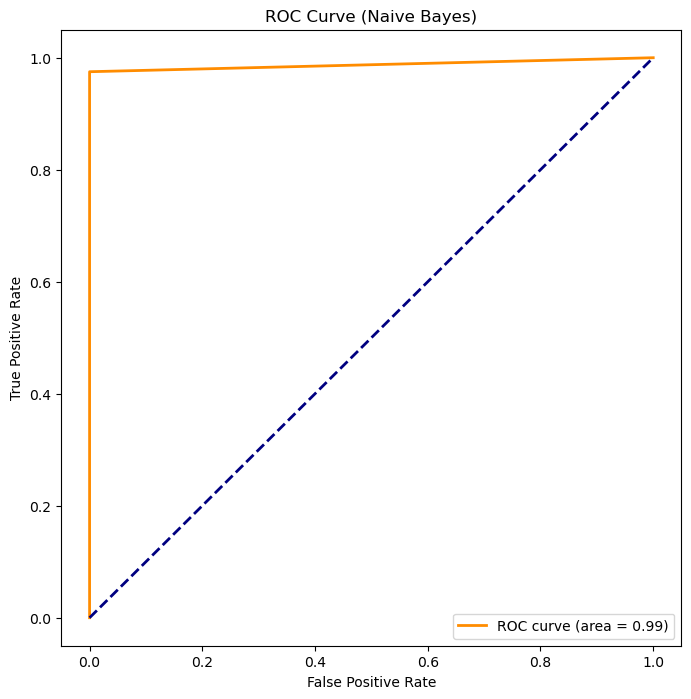

In [34]:
# ROC Curve for Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test_binary, y_pred_nb_binary)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(8, 8))
plt.plot(fpr_nb, tpr_nb, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_nb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Naive Bayes)')
plt.legend(loc="lower right")
plt.show()


In [35]:
# Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for Naive Bayes
mse_nb = mean_squared_error(y_test_binary, y_pred_nb_binary)
rmse_nb = np.sqrt(mse_nb)
print("Mean Squared Error (MSE):", mse_nb)
print("Root Mean Squared Error (RMSE):", rmse_nb)

Mean Squared Error (MSE): 0.016666666666666666
Root Mean Squared Error (RMSE): 0.12909944487358055


# USER GUI 

In [56]:
# Create the main window
root = tk.Tk()

# Create the main window with a themed style
style = ThemedStyle(root)
style.set_theme("blue")

# Set the title and icon
root.title("CKD Prediction")
root.iconbitmap("Erix-Subyarko-Medical-Medicine-Medicine-Tool-Doctor-Hospital-Stethoscope.512.ico") 

# Set the size of the window (width x height)
root.geometry("1250x500")  # Change the size as needed

# Load the background image
background_image = tk.PhotoImage(file="23-Blood-test_1400x700-Copy.png")  # Replace with the path to your image
background_label = tk.Label(root, image=background_image)
background_label.place(relwidth=1, relheight=1)  # Make the label cover the entire window

# Create and place the title label 
title_label = ttk.Label(root, text="Chronic Kidney Disease of Patients Prediction", font=('Arial', 24, 'bold'),
                        style="TLabel")
title_label.grid(row=0, column=0, columnspan=8, padx=10, pady=20)

# Create and place the guideline label with increased font size
guideline_label = ttk.Label(root, text="Please fill in the patient's health information in the provided fields. "
                                       "Then, click on the 'Predict' button below to generate and show the result.",
                            font=('Arial', 14), style="TLabel")
guideline_label.grid(row=1, column=0, columnspan=8, padx=10, pady=20)



# Create and place entry widgets for each feature in a 6x4 grid
entries = []
feature_labels = [
    "Age", "Blood Pressure mm/Hg", "Specific Gravity (1.005-1.025)", "Albumin (0-5)", "Sugar (0-5)",
    "Red Blood Cells (normal-1/abnormal-0)", "Pus Cell (normal-1/abnormal-0)", "Pus Cell Clumps (present-1/not present-0)", "Bacteria (normal-1/abnormal-0)",
    "Blood Glucose Random mgs/dl", "Blood Urea mgs/dl", "Serum Creatinine mgs/dl", "Sodium mEq/L",
    "Potassium mEq/L", "Hemoglobin gms", "Packed Cell Volume", "White Blood Cell Count cells/cumm",
    "Red Blood Cell Count cells/cumm", "Hypertension (yes-1/no-0)", "Diabetes Mellitus (yes-1/no-0)",
    "Coronary Artery Disease (yes-1/no-0)", "Appetite (good-1/poor-0)", "Pedal Edema (yes-1/no-0)", "Anemia (yes-1/no-0)"
]

row, col = 2, 0 # Start from row 2 (below the guideline label)
for i, label_text in enumerate(feature_labels):
    label = ttk.Label(root, text=label_text, style="TLabel")
    label.grid(row=row, column=col, padx=10, pady=5)
    entry = ttk.Entry(root, style="TEntry",width=10)
    entry.grid(row=row, column=col + 1, padx=10, pady=5)
    entries.append(entry)

    col += 2  # Move to the next column
    if col > 6:
        col = 0
        row += 1  # Move to the next row

# Create and place the predict button with a themed style
predict_button = ttk.Button(root, text="Predict", command=lambda: predict(entries, clf_gini, clf_rf, clf_svm, result_label),
                            style='TButton', takefocus=False)
predict_button.grid(row=row + 2, column=0, columnspan=8, pady=10)

# Create and place the result label
result_label = ttk.Label(root, text="Prediction for User Input:", style="PLabel.TLabel")
result_label.grid(row=row + 3, column=0, columnspan=8, pady=10)

# Add styling for labels and entries
style = ThemedStyle(root)
style.configure("TLabel", background=style.lookup("TFrame", "background"))
style.configure("TEntry", background=style.lookup("TFrame", "background"))
style.configure("PLabel.TLabel", font=('Arial', 12, 'bold'))


# Function to get user input for prediction
def get_user_input(entries):
    user_input = [float(entry.get()) for entry in entries]
    user_input_array = np.array(user_input).reshape(1, -1)
    return user_input_array


# Lambda function to predict and update the result label
predict_lambda = lambda: (
    user_input := get_user_input(entries),
    result_label.config(text=f"The model predicts: {clf_rf.predict(user_input)[0]}")
)

# Create and place the predict button without using the function
predict_button = ttk.Button(root, text="Predict", command=predict_lambda, style='TButton', takefocus=False)
predict_button.grid(row=row + 2, column=0, columnspan=8, pady=10)

def predict(entries, clf_gini, clf_rf, clf_svm, result_label):
    pass

def get_user_input(entries):
    user_input = [float(entry.get()) for entry in entries]
    user_input_array = np.array(user_input).reshape(1, -1)
    return user_input_array

def clear_input(entries):
    for entry in entries:
        entry.delete(0, tk.END)

def clear_output(result_label):
    result_label.config(text="Prediction for User Input:")

def on_entry_return(event):
    current_entry = event.widget
    current_row, current_col = current_entry.grid_info()["row"], current_entry.grid_info()["column"]

    # Calculate the next entry's row and column
    next_row = current_row
    next_col = current_col + 2
    if next_col > 6:
        next_col = 0
        next_row += 1

    # Move the focus to the next entry
    entries[next_row][next_col].focus_set()

def clear_input_and_output(entries, result_label):
    clear_input(entries)
    clear_output(result_label)
        
# Create and place the clear button
clear_button = ttk.Button(root, text="Clear", command=lambda: clear_input_and_output(entries, result_label),
                          style='TButton', takefocus=False)
clear_button.grid(row=row + 4, column=0, columnspan=8, pady=10)

# Run the Tkinter event loop
root.mainloop()

# Model Comparison

Accuracy Score 

In [37]:
results = pd.DataFrame({
    'Model': ['Support Vector Machine', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'Naive Bayes'],
    'Accuracy Score': [
        accuracy_score(y_test, y_pred_svm) * 100,
        accuracy_score(y_test, y_pred_gini) * 100,
        accuracy_score(y_test, y_pred_rf) * 100,
        accuracy_score(y_test, y_pred_lr) * 100,  # Logistic Regression
        accuracy_score(y_test, y_pred_nb) * 100   # Naive Bayes
    ]
})

result_df = results.sort_values(by='Accuracy Score', ascending=False)
result_df = result_df.set_index('Accuracy Score')
result_df

,Model
Accuracy Score,
99.166667,Random Forest
98.333333,Naive Bayes
96.666667,Decision Tree
93.333333,Logistic Regression
66.666667,Support Vector Machine


Classification Report

In [38]:
from sklearn.metrics import classification_report

# Create a DataFrame for Classification Report
classification_reports = []

# SVM
report_svm = classification_report(y_test, y_pred_svm, zero_division=1, output_dict=True)
classification_reports.append({'Model': 'SVM', **report_svm['weighted avg']})

# Decision Tree
report_dt = classification_report(y_test, y_pred_gini, output_dict=True)
classification_reports.append({'Model': 'Decision Tree', **report_dt['weighted avg']})

# Random Forest
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
classification_reports.append({'Model': 'Random Forest', **report_rf['weighted avg']})

# Logistic Regression
report_lr = classification_report(y_test, y_pred_lr, zero_division=1, output_dict=True)
classification_reports.append({'Model': 'Logistic Regression', **report_lr['weighted avg']})

# Naive Bayes
report_nb = classification_report(y_test, y_pred_nb, zero_division=1, output_dict=True)
classification_reports.append({'Model': 'Naive Bayes', **report_nb['weighted avg']})

# Create DataFrame
classification_df = pd.DataFrame(classification_reports)
classification_df = classification_df.set_index('Model')

# Sort DataFrame by Score in descending order
classification_df = classification_df.sort_values(by='f1-score', ascending=False).round(2)

# Print the DataFrame
print(classification_df)


                     precision  recall  f1-score  support
Model                                                    
Random Forest             0.99    0.99      0.99    120.0
Naive Bayes               0.98    0.98      0.98    120.0
Decision Tree             0.97    0.97      0.97    120.0
Logistic Regression       0.94    0.93      0.93    120.0
SVM                       0.78    0.67      0.53    120.0


MSE & RMSE

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create a DataFrame for MSE and RMSE
mse_rmse_results = []

# SVM
mse_svm = mean_squared_error(y_test_binary, y_pred_svm_binary)
rmse_svm = sqrt(mse_svm)
mse_rmse_results.append({'Model': 'SVM', 'MSE': mse_svm, 'RMSE': rmse_svm})

# Decision Tree
mse_dt = mean_squared_error(y_test_binary, y_pred_gini_binary)
rmse_dt = sqrt(mse_dt)
mse_rmse_results.append({'Model': 'Decision Tree', 'MSE': mse_dt, 'RMSE': rmse_dt})

# Random Forest
mse_rf = mean_squared_error(y_test_binary, y_pred_rf_binary)
rmse_rf = sqrt(mse_rf)
mse_rmse_results.append({'Model': 'Random Forest', 'MSE': mse_rf, 'RMSE': rmse_rf})

# Logistic Regression
mse_lr = mean_squared_error(y_test_binary, y_pred_lr_binary)
rmse_lr = sqrt(mse_lr)
mse_rmse_results.append({'Model': 'Logistic Regression', 'MSE': mse_lr, 'RMSE': rmse_lr})

# Naive Bayes
mse_nb = mean_squared_error(y_test_binary, y_pred_nb_binary)
rmse_nb = sqrt(mse_nb)
mse_rmse_results.append({'Model': 'Naive Bayes', 'MSE': mse_nb, 'RMSE': rmse_nb})

# Create DataFrame
mse_rmse_df = pd.DataFrame(mse_rmse_results)
mse_rmse_df = mse_rmse_df.set_index('Model')

# Sort DataFrame by MSE in ascending order
mse_rmse_df = mse_rmse_df.sort_values(by='MSE', ascending=False).round(2)

# Print the DataFrame
print(mse_rmse_df)


                      MSE  RMSE
Model                          
SVM                  0.33  0.58
Logistic Regression  0.07  0.26
Decision Tree        0.03  0.18
Naive Bayes          0.02  0.13
Random Forest        0.01  0.09


AUC Curve

                      AUC
Model                    
Random Forest        0.99
Naive Bayes          0.99
Decision Tree        0.97
Logistic Regression  0.94
SVM                  0.50


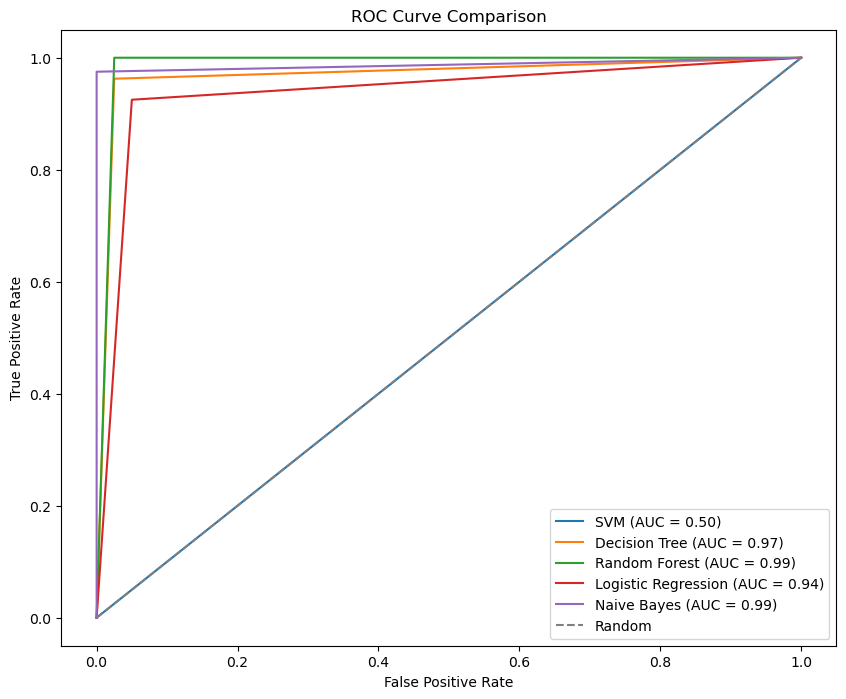

In [40]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create a DataFrame for AUC
auc_results = []

# SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test_binary, y_pred_svm_binary)
roc_auc_svm = auc(fpr_svm, tpr_svm)
auc_results.append({'Model': 'SVM', 'AUC': roc_auc_svm})

# Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test_binary, y_pred_gini_binary)
roc_auc_dt = auc(fpr_dt, tpr_dt)
auc_results.append({'Model': 'Decision Tree', 'AUC': roc_auc_dt})

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_binary, y_pred_rf_binary)
roc_auc_rf = auc(fpr_rf, tpr_rf)
auc_results.append({'Model': 'Random Forest', 'AUC': roc_auc_rf})

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test_binary, y_pred_lr_binary)
roc_auc_lr = auc(fpr_lr, tpr_lr)
auc_results.append({'Model': 'Logistic Regression', 'AUC': roc_auc_lr})

# Naive Bayes
fpr_nb, tpr_nb, _ = roc_curve(y_test_binary, y_pred_nb_binary)
roc_auc_nb = auc(fpr_nb, tpr_nb)
auc_results.append({'Model': 'Naive Bayes', 'AUC': roc_auc_nb})

# Create DataFrame
auc_df = pd.DataFrame(auc_results)
auc_df = auc_df.set_index('Model').round(2)

# Sort DataFrame by AUC in descending order
auc_df = auc_df.sort_values(by='AUC', ascending=False)

# Print the DataFrame
print(auc_df)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()